# Overview of Notebooks

* [HAPI_01.ipynb - Basics](HAPI_01.ipynb) 
* [HAPI_02.ipynb - Data structures](HAPI_02.ipynb)
* **[HAPI_03.ipynb - Plotting](HAPI_03.ipynb) (this Notebook)**
* [HAPI_04.ipynb - Problems](HAPI_04.ipynb)

# Setup

In [9]:
# Show Matplotlib plots in page instead of opening a window
%matplotlib inline 
# Have Matplotlib create vector (svg) instead of raster (png) images
%config InlineBackend.figure_formats = ['svg'] 

# Misc. configuration
import warnings
# See https://github.com/boto/boto3/issues/454 for an explanation.
warnings.simplefilter("ignore", ResourceWarning) # removes spurious Notebook warns
warnings.simplefilter("ignore", DeprecationWarning) # removes spurious Notebook warns

# `hapiplot` - Basic

The package `hapiplot` can be used to create a preliminary plot of data returned by the `hapi` function.

Interally, `hapiplot` uses Matplotlib and the functions `timeseries.py` and  `heatmap.py` in the directory [plot](https://github.com/hapi-server/client-python/tree/master/hapiclient/plot). 

`hapiplot` plots all of the parameters returned by a call to `hapi` and forms calls to `timeseries.py` and  `heatmap.py` with labels extracted from `meta`.

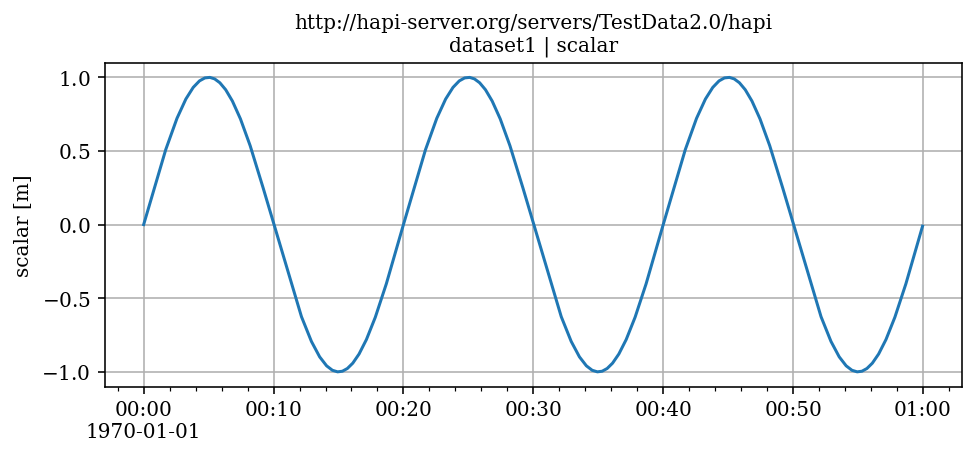

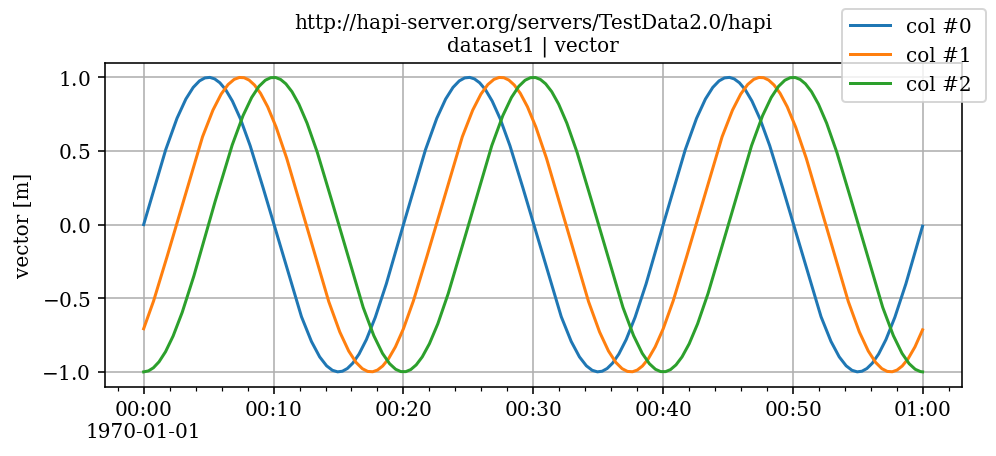

In [1]:
# Get data for use below
from hapiplot import hapiplot

server     = 'http://hapi-server.org/servers/TestData2.0/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:59:59'

status=hapiplot(server, dataset, parameters, start, stop)

# or, get data and pass to hapiplot():
#
# from hapiclient.hapi import hapi
# data,meta = hapi(server,dataset,parameters,start,stop)
# hapiplot(data, meta)

# `hapiplot` - Advanced


# MatplotLib

The standard package for plotting in Python is Matplotlib. The plotting features of this package are low-level, meaning that a significant amount of configuration is needed to configure a plot.

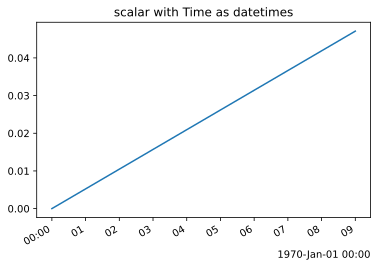

In [14]:
from hapiclient import hapi

server     = 'http://hapi-server.org/servers/TestData2.0/hapi'
dataset    = 'dataset1'
parameters = 'scalar'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data, meta = hapi(server,dataset,parameters,start,stop)

from matplotlib import pyplot as plt
from hapiclient import hapitime2datetime

# Convert data['Time'] elements to Python datetime objects
# Note the difference in tick labels when datetimes are used
plt.figure()
plt.plot(hapitime2datetime(data['Time']),data['scalar'])
plt.gcf().autofmt_xdate()
plt.title('scalar with Time as datetimes');

<div style="background-color:yellow">
<h3>Problem 03a</h3>

<p>Use the metadata in <code>meta</code> to label the y-axis with the name of the parameter and its units.</p>
</h3>

# Pandas

Similarly, we can convert the HAPI numpy data to a Pandas DataFrame like we did earlier, then plot that with the 'df.plot()' approach.

,x,y,z
Time,,,
1970-01-01 00:00:00+00:00,0.000000,-0.707107,-1.000000
1970-01-01 00:00:01+00:00,0.005236,-0.703395,-0.999986
1970-01-01 00:00:02+00:00,0.010472,-0.699663,-0.999945
1970-01-01 00:00:03+00:00,0.015707,-0.695913,-0.999877
1970-01-01 00:00:04+00:00,0.020942,-0.692143,-0.999781
1970-01-01 00:00:05+00:00,0.026177,-0.688355,-0.999657
1970-01-01 00:00:06+00:00,0.031411,-0.684547,-0.999507
1970-01-01 00:00:07+00:00,0.036644,-0.680721,-0.999328
1970-01-01 00:00:08+00:00,0.041876,-0.676876,-0.999123


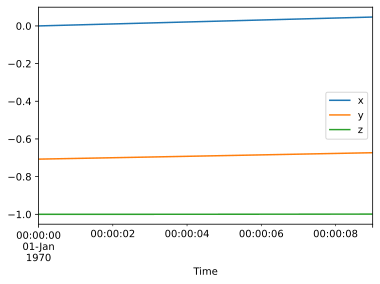

In [16]:
# Get data for use below
from hapiclient import hapi
from hapiclient import hapitime2datetime

server     = 'http://hapi-server.org/servers/TestData2.0/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data,meta = hapi(server,dataset,parameters,start,stop)

import pandas
# Create dataframe
df = pandas.DataFrame(data['vector'])

# Add column to DataFrame
df['Time'] = hapitime2datetime(data['Time'])

# Set index
df.set_index('Time', inplace=True)

# Rename columns
df.columns = ['x', 'y', 'z']

display(df)

%matplotlib inline
df.plot()

## PySPEDAS/PyTplot

PySPEDAS access HAPI servers without needing to install either the `hapiclient` or `hapiplot` packages.

In the following, data from a HAPI server is obtained using the `pyhapi` function in the `pyspedas` package and plotted using the `tplot` function in the `pytplot` package.

26-Apr-22 13:38:16: /opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Loading SW_P_Den
Loading SW_V


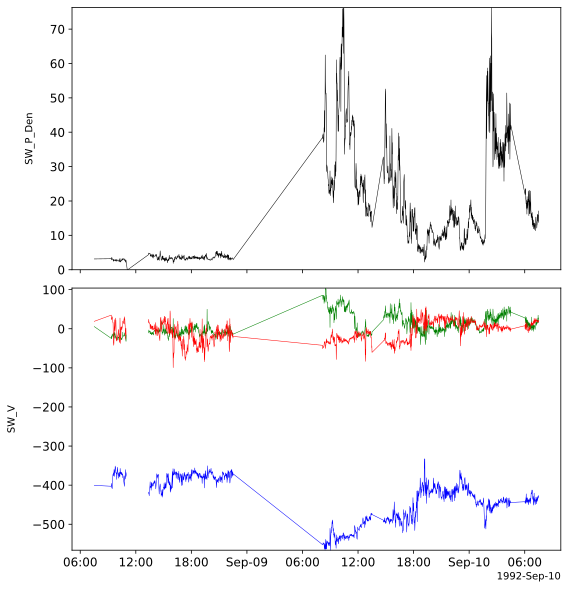

In [18]:
#!pip install pyspedas --upgrade

from pyspedas.hapi.hapi import hapi as pyhapi

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'GE_K0_CPI'
parameters = 'SW_P_Den,SW_V'
start      = '1992-09-08T07:30:40Z'
stop       = '1992-09-10T07:30:40.000Z'
x = pyhapi(trange=[start, stop], server=server, dataset=dataset, parameters=parameters)

from pytplot import tplot
tplot(x)

----
Next up, [data fusion](HAPI_04.ipynb)
----